In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('../assets/athlete_events.csv')

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
gkm=df.loc[df['Sex']=='M']
gkf=df.loc[df['Sex']=='F']
medals_m=gkm.groupby('Medal').count()['ID']
medals_f=gkf.groupby('Medal').count()['ID']
total_athletes=df['ID'].count()
total_male_athlete=gkm['ID'].count()
total_female_athlete=gkf['ID'].count()
total_male_medalist=gkm['Medal'].count()
total_female_medalist=gkf['Medal'].count()

In [5]:
print(medals_m)
print(medals_f)
m_colors=['aquamarine','#D8DADB']
f_colors=['turquoise','#D8DADB']

Medal
Bronze    9524
Gold      9622
Silver    9373
Name: ID, dtype: int64
Medal
Bronze    3771
Gold      3747
Silver    3735
Name: ID, dtype: int64


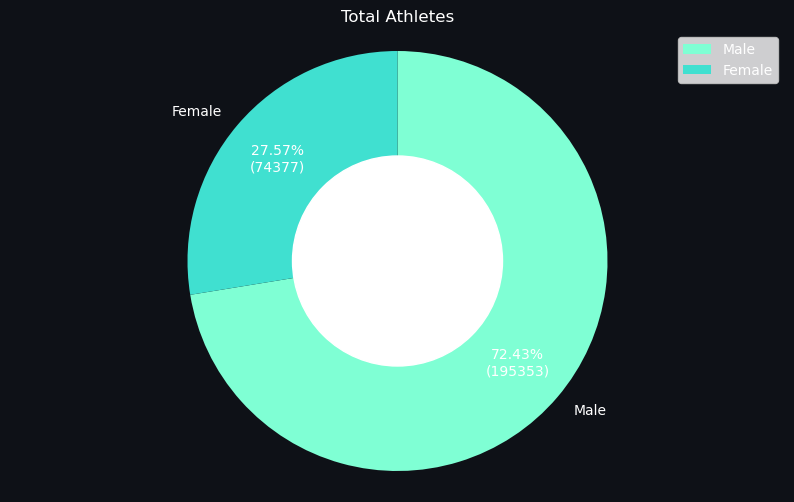

In [6]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.2f}%\n({absolute:d})"
def percent(sex,value):
    if sex==0:
        return value.__str__()+'\n Male Athletes \n'+f"{(value / total_athletes) * 100:.2f}%"
    else:
        return value.__str__()+'\n Female Athletes \n'+f"{(value / total_athletes) * 100:.2f}%"


fig=plt.figure(figsize=(10,6))
plt.rcParams['text.color'] = 'white'
circle=plt.Circle((0,0),0.5,color='white')
fig.patch.set_facecolor('#0e1117')
data=[total_male_athlete,total_female_athlete]
plt.pie(data,labels=['Male','Female'],colors=[m_colors[0],f_colors[0]],autopct=lambda pct: func(pct, data),counterclock=False,startangle=90,pctdistance=0.75,)
plt.axis('equal')
plt.title('Total Athletes')
plt.legend()
plt.gca().add_artist(circle)
plt.show()

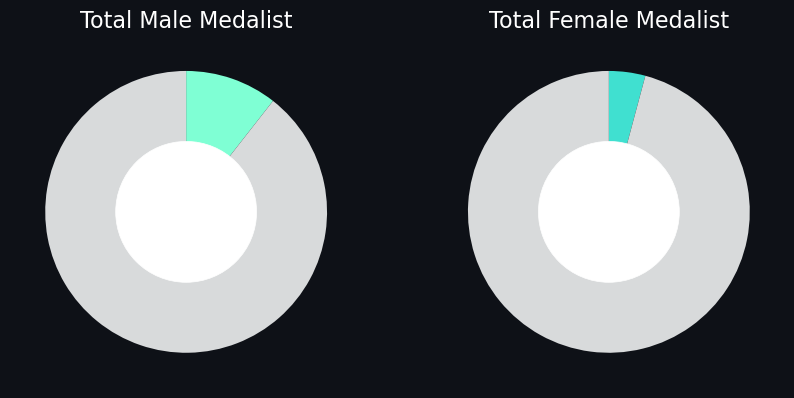

In [7]:

fig=plt.figure(figsize=(10,5))
fig.patch.set_facecolor('#0e1117')
plt.style.use('ggplot')
plt.subplot(1,2,1)
label=percent(0,total_male_medalist)
circle=plt.Circle((0,0),0.5,color='white')
data=[total_male_medalist,total_athletes-total_male_medalist]
plt.pie(data,colors=m_colors,counterclock=False,startangle=90,pctdistance=0.85)
plt.title('Total Male Medalist', fontsize=16)
plt.gca().add_artist(circle)
plt.text(0., 0., label,fontsize=12 , horizontalalignment='center', verticalalignment='center')


plt.subplot(1,2,2)
label=percent(1,total_female_medalist)
plt.rcParams['text.color'] = 'white'
circle=plt.Circle((0,0),0.5,color='white')
data=[total_female_medalist,total_athletes-total_female_medalist]
plt.pie(data,colors=f_colors,counterclock=False,startangle=90,pctdistance=0.85)
plt.title('Total Female Medalist', fontsize=16)
plt.gca().add_artist(circle)
plt.text(0., 0., label,fontsize=12 , horizontalalignment='center', verticalalignment='center')


plt.show()

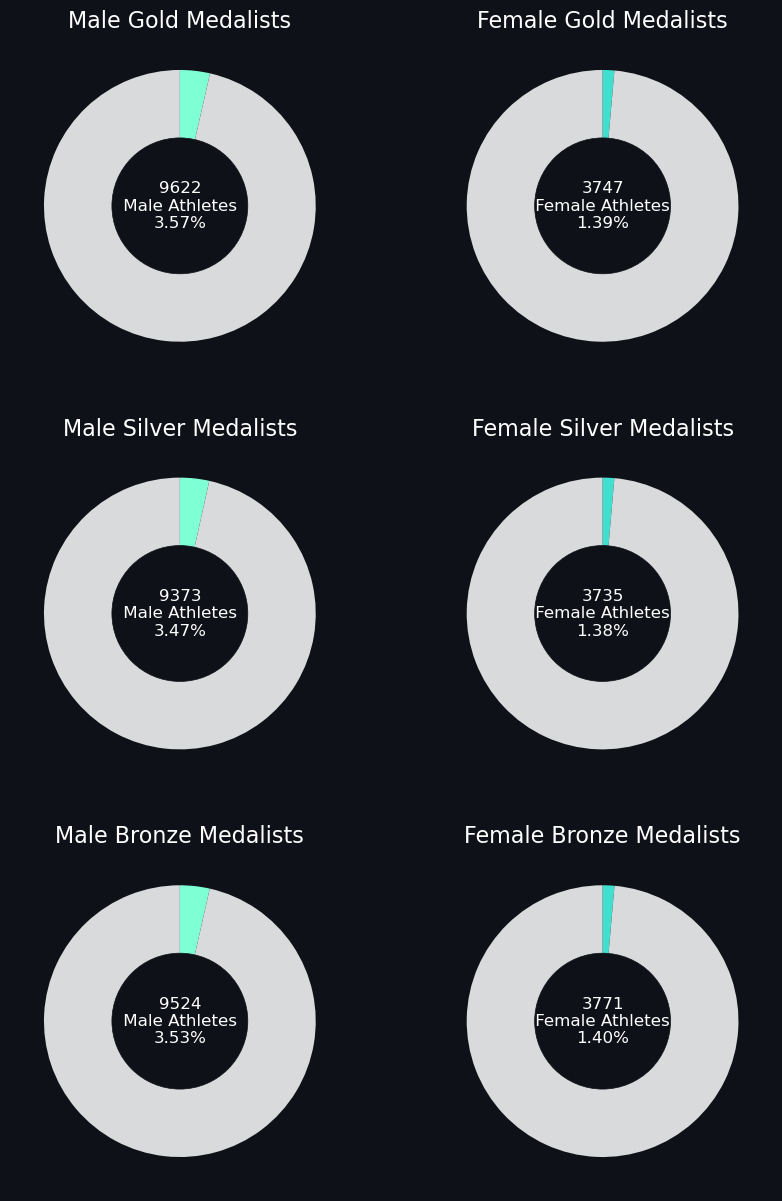

In [8]:

fig=plt.figure(figsize=(10,15))
fig.patch.set_facecolor('#0e1117')
plt.style.use('ggplot')
i=0
for medal in ['Gold','Silver','Bronze']:

    plt.subplot(3,2,i+1)
    label=percent(0,medals_m[medal])
    title='Male '+medal+' Medalists'
    circle=plt.Circle((0,0),0.5,color='#0e1117')
    data=[medals_m[medal],total_athletes-medals_m[medal]]
    plt.pie(data,colors=m_colors,counterclock=False,startangle=90,pctdistance=0.85)
    plt.title(title, fontsize=16)
    plt.gca().add_artist(circle)
    plt.text(0., 0., label,fontsize=12 , horizontalalignment='center', verticalalignment='center')

    plt.subplot(3,2,i+2)
    label=percent(1,medals_f[medal])
    title='Female '+medal+' Medalists'
    circle=plt.Circle((0,0),0.5,color='#0e1117')
    data=[medals_f[medal],total_athletes-medals_f[medal]]
    plt.pie(data,colors=f_colors,counterclock=False,startangle=90,pctdistance=0.85)
    plt.title(title, fontsize=16)
    plt.gca().add_artist(circle)
    plt.text(0., 0., label,fontsize=12 , horizontalalignment='center', verticalalignment='center')
    i+=2  

plt.show()

In [9]:
year_wise_male_medal=gkm.groupby('Year').count()['Medal']
year_wise_female_medal=gkf.groupby('Year').count()['Medal']